# DSCI 303 - Homework 07
### Lauren Forti

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# upload data into dfs
iris = pd.read_csv('iris.txt', sep='\t')
ames = pd.read_csv('ames_housing.txt', sep='\t')
titanic = pd.read_csv('titanic.txt', sep='\t')
batting = pd.read_csv('batting.csv', sep=',')

## Problem 1: Iris Dataset

In [3]:
# display first 8 rows
display(iris.head(8))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.5,4.2,1.4,0.2,setosa
1,5.6,3.0,4.5,1.5,versicolor
2,7.2,3.6,6.1,2.5,virginica
3,4.8,3.0,1.4,0.3,setosa
4,5.5,2.4,3.8,1.1,versicolor
5,5.8,2.7,3.9,1.2,versicolor
6,6.0,3.4,4.5,1.6,versicolor
7,7.7,3.0,6.1,2.3,virginica


In [4]:
# get summary statistics
display(iris.describe())

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# group by species and get means
iris_means = iris.groupby('species').mean()
display(iris_means)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


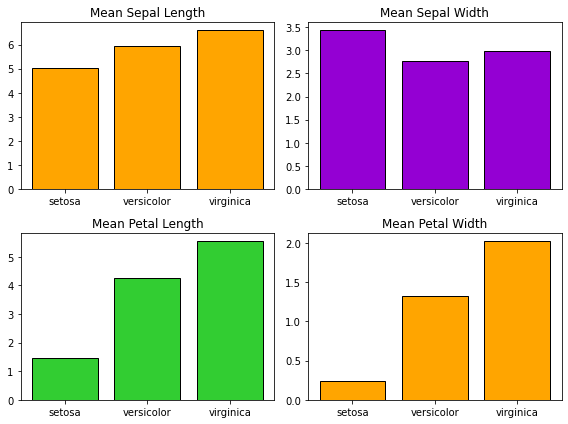

In [6]:
# list of colors
iris_colors = ['darkviolet', 'limegreen', 'orange']
iris_columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

plt.figure(figsize = [8,6])
# plot bar charts
for c in range(iris_means.shape[1]):
    plt.subplot(2, 2, c+1)
    plt.bar(x=iris_means.index.values,
            height = iris_means.iloc[:, c],
            color=iris_colors[c-1],
            edgecolor='black')
    # set title
    plt.title('Mean ' + iris_columns[c])
    
plt.tight_layout()
plt.show()

## Problem 2: Ames Housing - Neighborhoods

In [7]:
# display first 8 rows
display(ames.head(8))

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500


In [8]:
# get column names
print(ames.columns.values)

['Order' 'PID' 'MS SubClass' 'MS Zoning' 'Lot Frontage' 'Lot Area'
 'Street' 'Alley' 'Lot Shape' 'Land Contour' 'Utilities' 'Lot Config'
 'Land Slope' 'Neighborhood' 'Condition 1' 'Condition 2' 'Bldg Type'
 'House Style' 'Overall Qual' 'Overall Cond' 'Year Built' 'Year Remod/Add'
 'Roof Style' 'Roof Matl' 'Exterior 1st' 'Exterior 2nd' 'Mas Vnr Type'
 'Mas Vnr Area' 'Exter Qual' 'Exter Cond' 'Foundation' 'Bsmt Qual'
 'Bsmt Cond' 'Bsmt Exposure' 'BsmtFin Type 1' 'BsmtFin SF 1'
 'BsmtFin Type 2' 'BsmtFin SF 2' 'Bsmt Unf SF' 'Total Bsmt SF' 'Heating'
 'Heating QC' 'Central Air' 'Electrical' '1st Flr SF' '2nd Flr SF'
 'Low Qual Fin SF' 'Gr Liv Area' 'Bsmt Full Bath' 'Bsmt Half Bath'
 'Full Bath' 'Half Bath' 'Bedroom AbvGr' 'Kitchen AbvGr' 'Kitchen Qual'
 'TotRms AbvGrd' 'Functional' 'Fireplaces' 'Fireplace Qu' 'Garage Type'
 'Garage Yr Blt' 'Garage Finish' 'Garage Cars' 'Garage Area' 'Garage Qual'
 'Garage Cond' 'Paved Drive' 'Wood Deck SF' 'Open Porch SF'
 'Enclosed Porch' '3Ssn Porch' 'Sc

In [9]:
# calc avg sale price for each neighborhood
ames_nbhd = ames[['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean()
# sort ascending
ames_nbhd = ames_nbhd.sort_values('SalePrice')

# display first 5 rows
display(ames_nbhd.head(5))

,SalePrice
Neighborhood,
MeadowV,95756.486486
IDOTRR,103752.903226
BrDale,105608.333333
OldTown,123991.891213
BrkSide,124756.250000


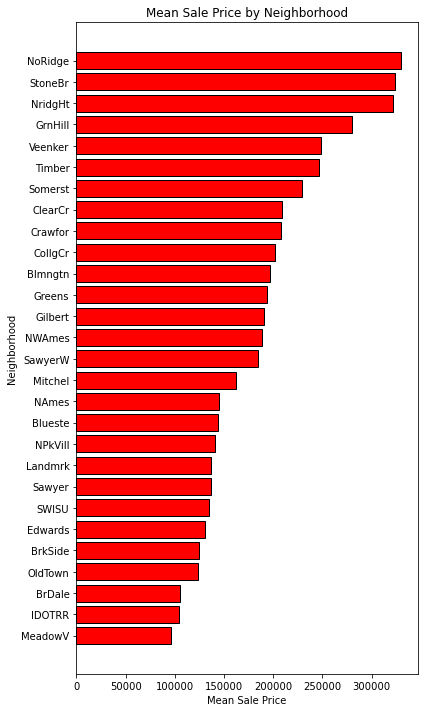

In [10]:
plt.figure(figsize = [6,10])

# plot horizontal bar chart
plt.barh(y=ames_nbhd.index.values,
        width=ames_nbhd.loc[:, 'SalePrice'],
        color='red',
        edgecolor='black')

# set title and labels
plt.title('Mean Sale Price by Neighborhood')
plt.xlabel('Mean Sale Price')
plt.ylabel('Neighborhood')

plt.tight_layout()
plt.show()

## Problem 3: Ames Housing – House Styles

In [11]:
# calc count of style
ames_style = ames[['House Style', 'SalePrice']].groupby('House Style').count()

# rename cols
ames_style.rename(columns={'SalePrice':'Count'}, inplace=True)

# sort ascending
ames_style = ames_style.sort_values('Count')

# display df
display(ames_style)

,Count
House Style,
2.5Fin,8
1.5Unf,19
2.5Unf,24
SFoyer,83
SLvl,128
1.5Fin,314
2Story,873
1Story,1481


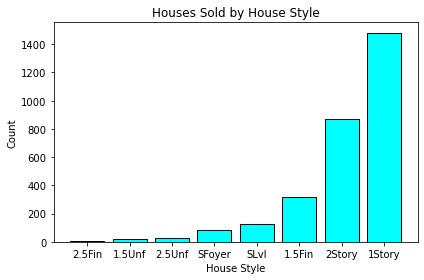

In [12]:
plt.figure(figsize = [6,4])

# plot bar charts
plt.bar(x=ames_style.index.values,
        height = ames_style.loc[:, 'Count'],
        color='cyan',
        edgecolor='black')

# set title and labels
plt.title('Houses Sold by House Style')
plt.xlabel('House Style')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Problem 4: Titanic Dataset – Survival Rates

In [13]:
# display first 8 rows
display(titanic.head(8))

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


In [14]:
# proportion of passengers who survived
svd = titanic.loc[:, 'Survived'].mean()
print(f'Proportion of Passengers who survived: {svd:.4f}')

Proportion of Passengers who survived: 0.3856


In [15]:
# use grouping to get survival rates based on class and sex
surv_rates = titanic[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean()
display(surv_rates)

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

## Problem 5: Titanic Dataset – Sex Distribution by Class and Outcome

In [16]:
# add new cols of male and female
titanic['Female'] = np.where(titanic.loc[:, 'Sex'] == 'female', 1, 0)
titanic['Male'] = np.where(titanic.loc[:, 'Sex'] == 'male', 1, 0)

# show first 8 rows
display(titanic.head(8))

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Female,Male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,0,1
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,0,1
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,0,1


In [17]:
# get sex by class
sex_dist_by_class = titanic.loc[:, ['Pclass', 'Female', 'Male']].groupby('Pclass').sum()
# show df
display(sex_dist_by_class)

,Female,Male
Pclass,,
1,94,122
2,76,108
3,144,343


In [18]:
# get sex by survival status
sex_dist_by_outcome = titanic.loc[:,['Survived', 'Female', 'Male']].groupby('Survived').sum()
# show df
display(sex_dist_by_outcome)

,Female,Male
Survived,,
0,81,464
1,233,109


## Problem 6: Batting Data – Home Runs

In [19]:
# show first 5 rows
display(batting.head())

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [20]:
# output names of columns
print(batting.columns.values)

['playerID' 'yearID' 'stint' 'teamID' 'lgID' 'G' 'AB' 'R' 'H' '2B' '3B'
 'HR' 'RBI' 'SB' 'CS' 'BB' 'SO' 'IBB' 'HBP' 'SH' 'SF' 'GIDP']


In [21]:
# get team home runs
total_hr = batting.loc[:, ['yearID', 'teamID', 'HR']].groupby(['teamID', 'yearID'], as_index=False).sum()
# sort descending
total_hr = total_hr.sort_values('HR', ascending = False)

# show first 10 rows
display(total_hr.head(10))

,teamID,yearID,HR
1840,NYA,2018,267
2384,SEA,1997,264
2722,TEX,2005,260
2771,TOR,2010,257
125,BAL,1996,257
145,BAL,2016,253
1273,HOU,2000,249
2718,TEX,2001,246
1834,NYA,2012,245
2383,SEA,1996,245


In [22]:
# get avg home runs for team
avg_hr = total_hr.loc[:, ['teamID', 'HR']].groupby('teamID').mean()
# sort descending
avg_hr = avg_hr.sort_values('HR', ascending = False)

# show first 10 rows
display(avg_hr.head(10))

,HR
teamID,
COL,181.769231
MIL,180.761905
ML1,171.538462
ARI,170.142857
TOR,168.452381
ANA,165.500000
TEX,163.851064
TBA,162.714286
OAK,158.196078


## Problem 7: Batting Data – Batting Averages

In [23]:
# get batting for teams
batting_avg = batting.loc[:, ['teamID', 'yearID', 'H', 'AB']].groupby(['teamID', 'yearID']).sum()

# add batting average col
batting_avg['BA'] = batting_avg.loc[:, 'H']/batting_avg.loc[:, 'AB']
# sort descending
batting_avg = batting_avg.sort_values('BA', ascending = False)

# show first 10 rows
display(batting_avg.head(10))

H    AB        BA
teamID yearID                      
PHI    1894    1780  5088  0.349843
BLN    1894    1647  4799  0.343196
BS1    1873     933  2748  0.339520
CHN    1876     926  2748  0.336972
BSN    1894    1658  5011  0.330872
PHI    1895    1664  5037  0.330355
BLN    1896    1548  4719  0.328036
       1897    1584  4872  0.325123
       1895    1530  4725  0.323810
BS1    1875    1128  3515  0.320910

## Problem 8: Batting Data – Cardinals vs. Cubs

In [24]:
# get St. Louis Cardinals info for every season since 1900
stl_batting = batting.loc[(batting.loc[:,'teamID']=='SLN')&(batting.loc[:,'yearID']>=1900),['yearID', 'H', 'AB', 'HR']]

# group by year
stl_batting = stl_batting.groupby('yearID').sum()

# add batting average col
stl_batting['BA'] = stl_batting.loc[:,'H']/stl_batting.loc[:,'AB']


# get Chicago Cubs info for every season since 1900
chi_batting = batting.loc[(batting.loc[:,'teamID']=='CHN')&(batting.loc[:,'yearID']>=1900),['yearID', 'H', 'AB', 'HR']]

# group by year
chi_batting = chi_batting.groupby('yearID').sum()

# add batting average col
chi_batting['BA'] = chi_batting.loc[:,'H']/chi_batting.loc[:,'AB']

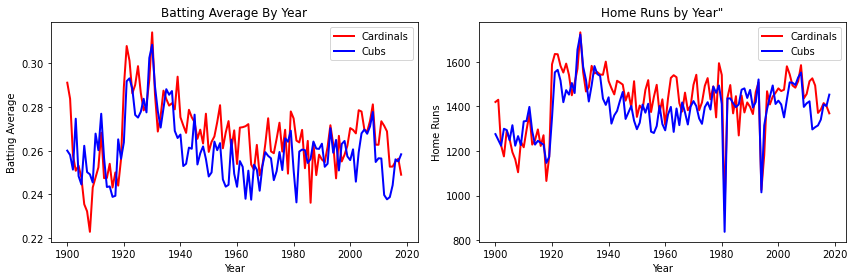

In [25]:
# plot line chart of batting avgs and home runs
plt.figure(figsize=[12,4])

## BATTING AVGS ##
plt.subplot(1,2,1)
# St. Louis Cardinals batting avg
plt.plot(stl_batting.index.values,
         stl_batting.loc[:,'BA'],
         color='red',
         lw=2)
# Chicago Cubs batting avg
plt.plot(chi_batting.index.values,
         chi_batting.loc[:,'BA'],
         color='blue',
         lw=2)
# add legend
plt.legend(labels=['Cardinals', 'Cubs'])

# add labels
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title('Batting Average By Year')


## HOME RUNS ##
plt.subplot(1,2,2)
# St. Louis Cardinals home runs
plt.plot(stl_batting.index.values,
         stl_batting.loc[:,'H'],
         color='red',
         lw=2)
# Chicago Cubs batting avg
plt.plot(chi_batting.index.values,
         chi_batting.loc[:,'H'],
         color='blue',
         lw=2)
# add legend
plt.legend(labels=['Cardinals', 'Cubs'])

# add labels
plt.xlabel('Year')
plt.ylabel('Home Runs')
plt.title('Home Runs by Year"')


# plot both charts
plt.tight_layout()
plt.show()

In [26]:
# proportion of years since 1900 where Cardinals had higher batting avg than Cubs
higher_BA = np.mean(stl_batting.loc[:,'BA']>chi_batting.loc[:,'BA'])
print(f'Proportion of when Cardinals had a higher batting average than Cubs: {higher_BA:.4f}')

Proportion of when Cardinals had a higher batting average than Cubs: 0.7143


In [27]:
# proportion of years since 1900 where Cardinals had more home runs than the Cubs
higher_H = np.mean(stl_batting.loc[:,'H']>chi_batting.loc[:,'H'])
print(f'Proportion of when Cardinals had more home runs than Cubs: {higher_H:.4f}')

Proportion of when Cardinals had more home runs than Cubs: 0.6891
